In [1]:
import yfinance as yf

In [2]:
# Define the stock ticker
ticker = 'AAPL'
# Fetch historical market data
stock_data = yf.Ticker(ticker)
# Download historical data from the past 5 years at a daily interval
data = stock_data.history(start='2019-09-16', end='2024-09-16', interval='1wk')
data.to_csv('apple_stock_data.csv')
print("Data successfully downloaded and saved as apple_stock_data.csv")

Data successfully downloaded and saved as apple_stock_data.csv


In [3]:
# Setting the framework for EDA
import pandas as pd
# Read the CSV file
df = pd.read_csv('apple_stock_data.csv', index_col = 'Date', parse_dates = True)

In [4]:
# Check the first few rows
print(df.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-09-16 00:00:00-04:00  52.671284  54.130007  52.608388  52.671284   
2019-09-23 00:00:00-04:00  52.966413  53.822780  52.528555  52.934967   
2019-09-30 00:00:00-04:00  53.438130  55.208920  52.042307  54.916206   
2019-10-07 00:00:00-04:00  54.737208  57.487735  54.267900  57.141804   
2019-10-14 00:00:00-04:00  56.824894  57.606269  56.413646  57.190182   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-09-16 00:00:00-04:00  569162000        0.0           0.0  
2019-09-23 00:00:00-04:00  465780800        0.0           0.0  
2019-09-30 00:00:00-04:00  634486800        0.0           0.0  
2019-10-07 00:00:00-04:00  588705600        0.0           0.0  
2019-10-14 00:00:00-04:00  422709600        0.0           0.0  


In [5]:
# Check for basic info (data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 2019-09-16 00:00:00-04:00 to 2024-09-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          261 non-null    float64
 1   High          261 non-null    float64
 2   Low           261 non-null    float64
 3   Close         261 non-null    float64
 4   Volume        261 non-null    int64  
 5   Dividends     261 non-null    float64
 6   Stock Splits  261 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.3+ KB
None


In [6]:
# Check for missing values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

0


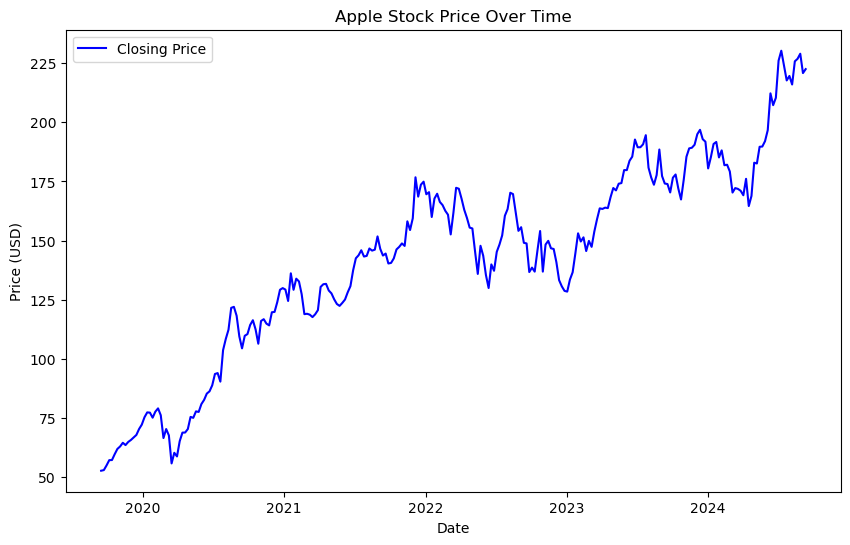

In [8]:
import matplotlib.pyplot as plt
# Plot the stock's closing prices
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label = 'Closing Price', color = 'blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [9]:
import numpy as np
# Calculate log returns
df['Log Returns']= np.log(df['Close'] / df['Close'].shift(1))
# Drop any NaN values that were created by the shift
df.dropna(inplace=True)
# Display the first few rows of the log returns
df[['Close', 'Log Returns']].head()

,Close,Log Returns
Date,,
2019-09-23 00:00:00-04:00,52.934967,0.004994
2019-09-30 00:00:00-04:00,54.916206,0.036744
2019-10-07 00:00:00-04:00,57.141804,0.039727
2019-10-14 00:00:00-04:00,57.190182,0.000846
2019-10-21 00:00:00-04:00,59.650421,0.042119


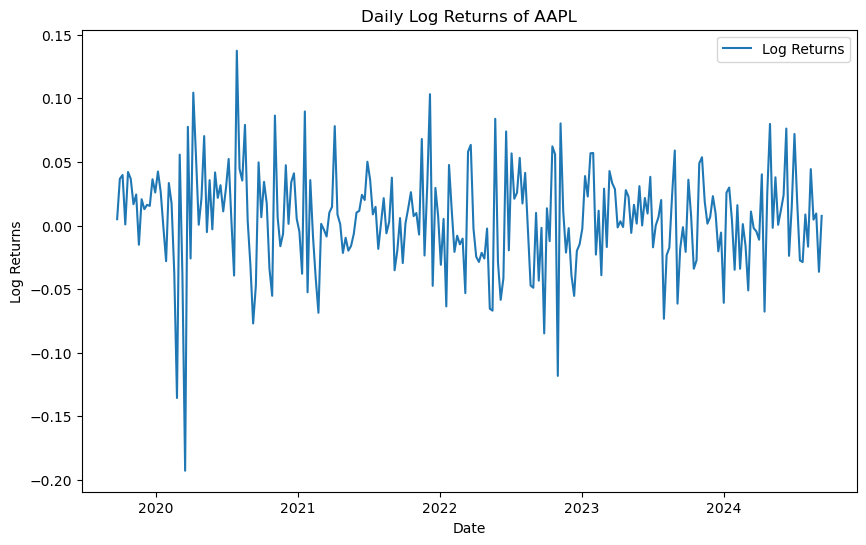

In [10]:
# Plot the log returns
plt.figure(figsize=(10,6))
plt.plot(df['Log Returns'], label='Log Returns')
plt.title('Daily Log Returns of AAPL')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

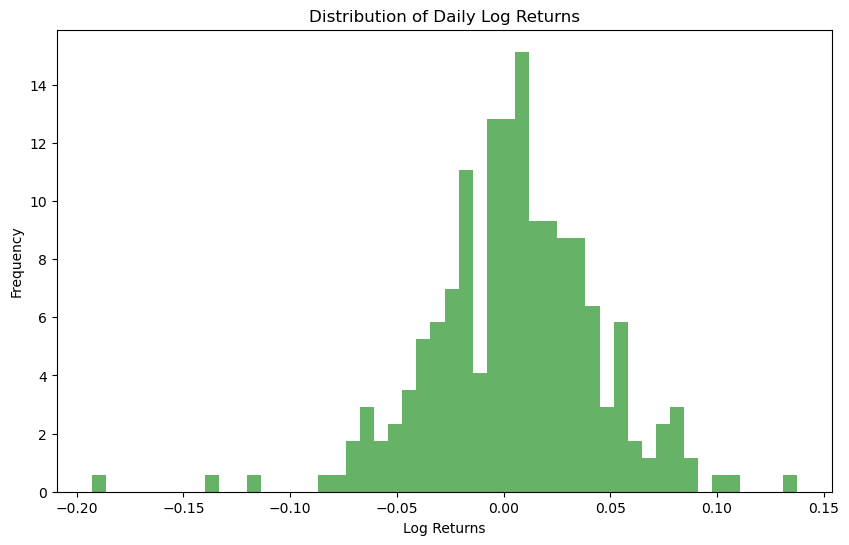

In [11]:
# Plot the histogram of log returns
plt.figure(figsize=(10,6))
plt.hist(df['Log Returns'], bins=50, density=True, alpha=0.6, color='g')

# Adding titles and labels
plt.title('Distribution of Daily Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

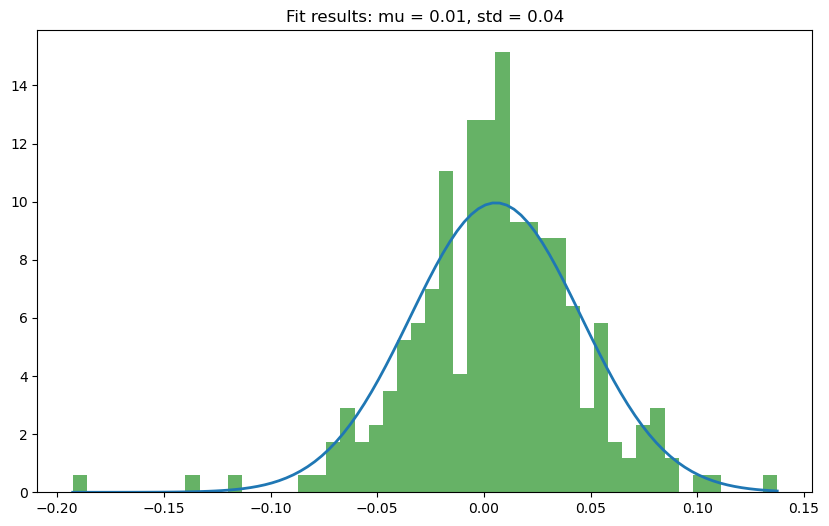

In [12]:
import scipy.stats as stats

# Fit log returns to a normal distribution
mu, std = stats.norm.fit(df['Log Returns'])

# Generate values from the fitted normal distribution
x = np.linspace(df['Log Returns'].min(), df['Log Returns'].max(), 100)
p = stats.norm.pdf(x, mu, std)

# Plot the histogram and the fitted distribution
plt.figure(figsize=(10,6))
plt.hist(df['Log Returns'], bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, p, linewidth=2)
plt.title(f'Fit results: mu = {mu:.2f}, std = {std:.2f}')
plt.show()

In [13]:
# Perform the Chi-Square Goodness of Fit test
observed_freq, bins = np.histogram(df['Log Returns'], bins=50, density=True)

# Calculate the expected frequencies using the normal distribution PDF
bin_centers = 0.5 * (bins[1:] + bins[:-1])
expected_freq = stats.norm.pdf(bin_centers, mu, std) * len(df['Log Returns']) * np.diff(bins)

# Scale the expected frequencies to match the observed frequencies
expected_freq *= observed_freq.sum()/expected_freq.sum()

# Perform chi-square test
chi_square_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print(f"Chi-Square Statistic: {chi_square_stat}, p-value: {p_value}")

Chi-Square Statistic: 4845.647439344489, p-value: 0.0


In [14]:
# Perform the KS test before outliers were capped 
ks_stat, p_value = stats.kstest(df['Log Returns'], 'norm', args=(mu, std))
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

KS Statistic: 0.05816340052858682, p-value: 0.32985108979145916


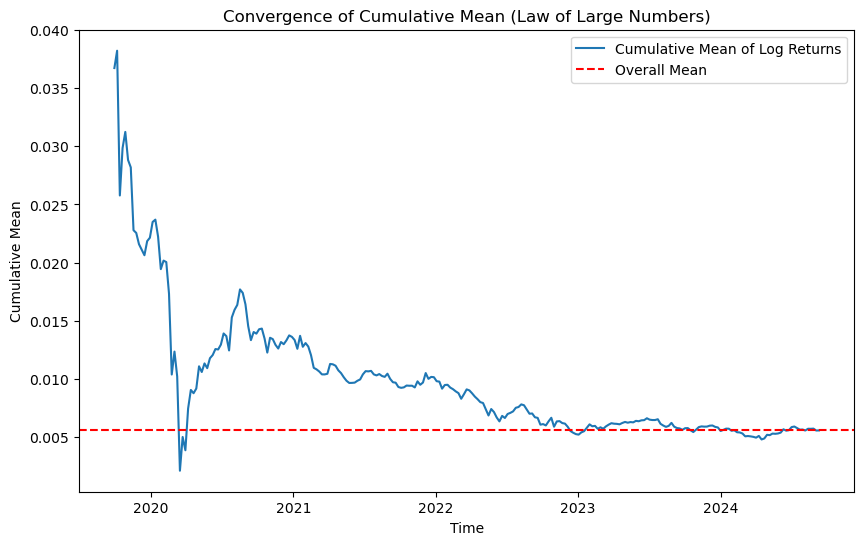

In [17]:
# Calculate cumulative mean of log returns
log_returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()
cumulative_mean = np.cumsum(log_returns) / np.arange(1, len(log_returns) + 1)

# Plot cumulative mean
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean, label="Cumulative Mean of Log Returns")
plt.axhline(y=np.mean(log_returns), color='r', linestyle='--', label="Overall Mean")
plt.xlabel('Time')
plt.ylabel('Cumulative Mean')
plt.title('Convergence of Cumulative Mean (Law of Large Numbers)')
plt.legend()
plt.show()

In [18]:
from scipy.stats import skew, kurtosis

# Calculate moments
mean_log_return = np.mean(log_returns)
variance_log_return = np.var(log_returns)
skewness_log_return = skew(log_returns)
kurtosis_log_return = kurtosis(log_returns)

print(f"Mean of Log Returns: {mean_log_return: .4f}")
print(f"Variance of Log Returns: {variance_log_return:.4f}")
print(f"Skewness of Log Returns: {skewness_log_return: .4f}")
print(f"Kurtosis of Log Returns: {kurtosis_log_return: .4f}")

Mean of Log Returns:  0.0055
Variance of Log Returns: 0.0016
Skewness of Log Returns: -0.4854
Kurtosis of Log Returns:  2.5235


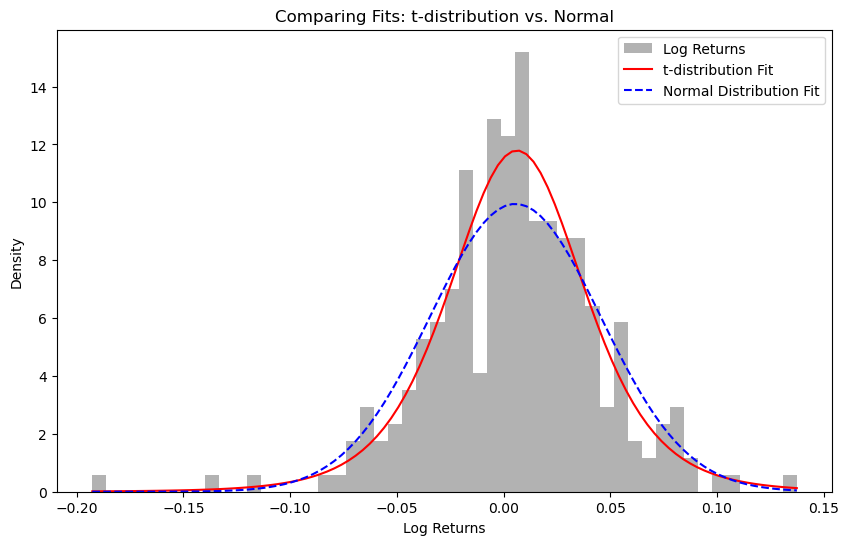

In [19]:
from scipy.stats import t, norm 

# Fit t-distribution and normal distribution
params_t = t.fit(log_returns)
params_norm = norm.fit(log_returns)

# Generate PDF values for plotting
x = np.linspace(log_returns.min(), log_returns.max(), 100)
pdf_t = t.pdf(x, *params_t)
pdf_norm = norm.pdf(x, *params_norm)

# Plot the histograms and fitted PDFs
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='gray', label="Log Returns")
plt.plot(x, pdf_t, 'r-', label="t-distribution Fit")
plt.plot(x, pdf_norm, 'b--', label="Normal Distribution Fit")
plt.title('Comparing Fits: t-distribution vs. Normal')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
from scipy.stats import kstest

# Generate CDF values for the t-distribution and normal distribution
cdf_t = lambda x: t.cdf(x, *params_t)
cdf_norm = lambda x: norm.cdf(x, *params_norm)

# Perform the KS test for t-distribution
ks_stat_t, p_value_t = kstest(log_returns, cdf_t)

# Perform the KS test for normal distribution
ks_stat_norm, p_value_norm = kstest(log_returns, cdf_norm)

# Print the KS test results
print(f"KS Statistic for t-distribution: {ks_stat_t}, p-value: {p_value_t}")
print(f"KS Statistic for normal distribution: {ks_stat_norm}, p-value: {p_value_norm}")

# Compare which fit is better
if p_value_t < 0.05 and p_value_norm < 0.05:
    print("Both fits are rejected based on the p-values.")
elif p_value_t < 0.05:
    print("The t-distribution fit is rejected based on the p-value.")
elif p_value_norm < 0.05:
    print("The normal distribution fit is rejected based on the p-value.")
else:
    # If neither fit is rejected, compare the KS statistics
    if ks_stat_t < ks_stat_norm:
        print("The t-distribution provides a better fit based on the KS statistic.")
    else:
        print("The normal distribution provides a better fit based on the KS statistic. ")


KS Statistic for t-distribution: 0.03279047801364149, p-value: 0.9347151579054498
KS Statistic for normal distribution: 0.057117598600984976, p-value: 0.3533796972435439
The t-distribution provides a better fit based on the KS statistic.
